# Volcanic Forcings: CMIP5 vs CMIP6
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [1]:
!date

Mon Jan 29 16:18:09 EST 2018


In [2]:
%matplotlib notebook

### Data

In [3]:
# Parameters
data_name = 'extsw_b05'
p = 50
nclist = [{'tag': 'CMIP5', 'ncfile': '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP5/extsw_data.nc'},
          {'tag': 'CMIP6', 'ncfile': '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP6/extsw_V3_DATATROP_RCP.nc'}
         ]

In [4]:
dss = dict()
das = list()
for nc in nclist:
    tag = nc['tag']
    ncfile = nc['ncfile']
    ds = xr.open_dataset(ncfile)
    dss[tag] = ds
    da = ds[data_name].isel(lon=0).mean('pfull').load()
    das.append(da)
da = xr.concat(das, pd.Index([nc['tag'] for nc in nclist], name='Source'))
print(da)

<xarray.DataArray 'extsw_b05' (Source: 2, time: 3012, lat: 90)>
array([[[  3.487170e-08,   3.490053e-08, ...,   4.048071e-08,   4.053305e-08],
        [  3.319691e-08,   3.323154e-08, ...,   3.863738e-08,   3.868185e-08],
        ..., 
        [           nan,            nan, ...,            nan,            nan],
        [           nan,            nan, ...,            nan,            nan]],

       [[  5.908267e-08,   5.905473e-08, ...,   6.727079e-08,   6.727653e-08],
        [  5.225953e-08,   5.223682e-08, ...,   8.943656e-08,   8.942972e-08],
        ..., 
        [  1.077469e-07,   1.077984e-07, ...,   1.705990e-07,   1.706039e-07],
        [  1.117088e-07,   1.117584e-07, ...,   1.726518e-07,   1.726638e-07]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16 1850-02-16 1850-03-16 ...
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
    lon      float32 1.0
  * Source   (Source) object 'CMIP5' 'CMIP6'


### Plot

<IPython.core.display.Javascript object>


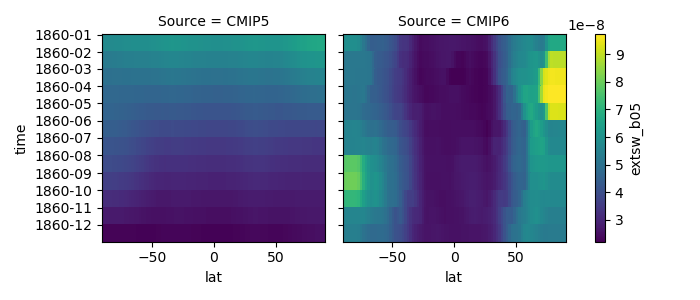

In [6]:
da.sel(time='1860').plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


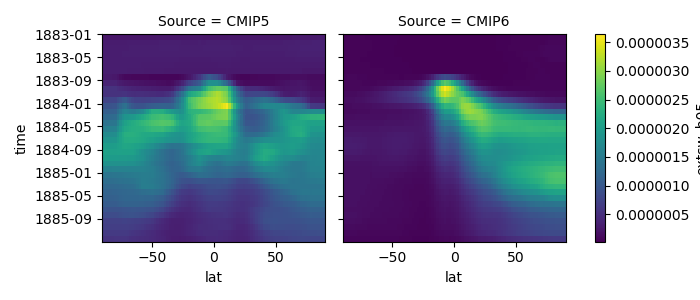

In [14]:
# Krakatau, Indonesia, 1883
da.sel(time=slice('1883', '1885')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


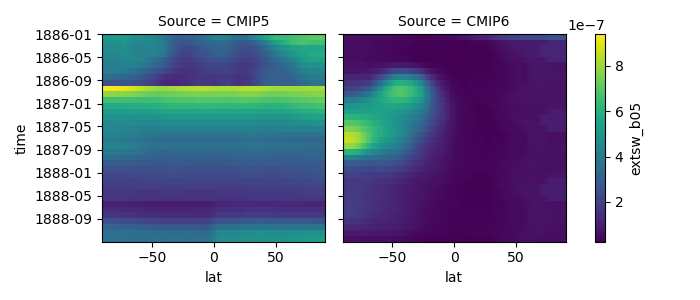

In [19]:
# Okataina[Tarawera], North Island, New Zealand, 1886
da.sel(time=slice('1886', '1888')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


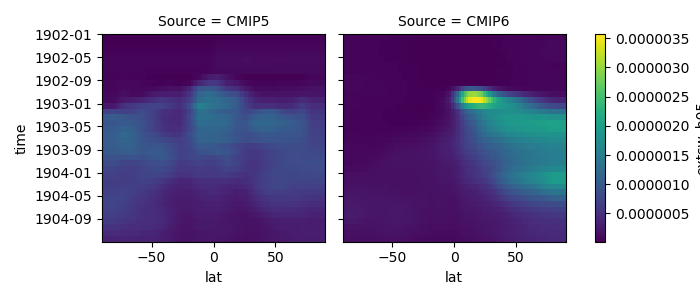

In [20]:
# Santa Maria, Guatemala, 1902
da.sel(time=slice('1902', '1904')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


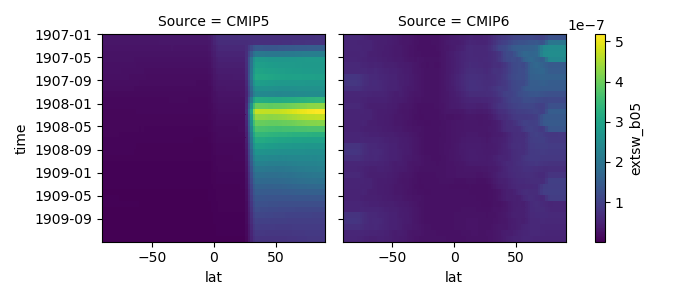

In [21]:
# Ksudach, Kamchatka, Russia, 1907
da.sel(time=slice('1907', '1909')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


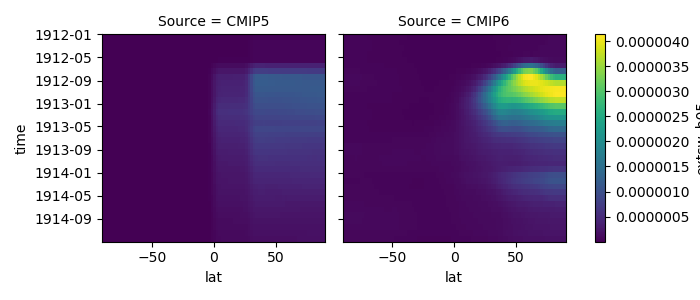

In [22]:
# Novarupta[Katmai], Alaska, United States, 1912
da.sel(time=slice('1912', '1914')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


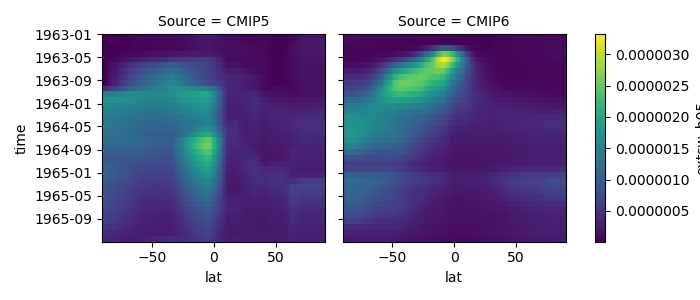

In [23]:
# Agung, Bali, Indonesia, 1963
da.sel(time=slice('1963', '1965')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


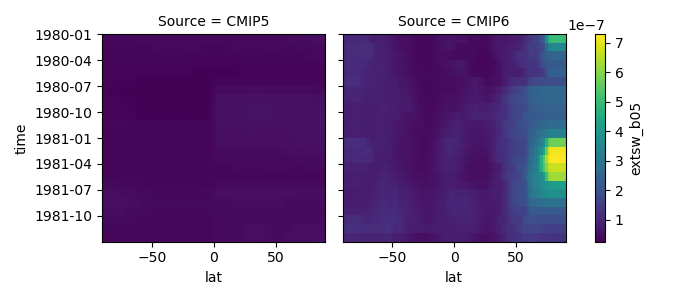

In [25]:
# Mount St. Helens, Washington, United States, 1980
da.sel(time=slice('1980', '1981')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


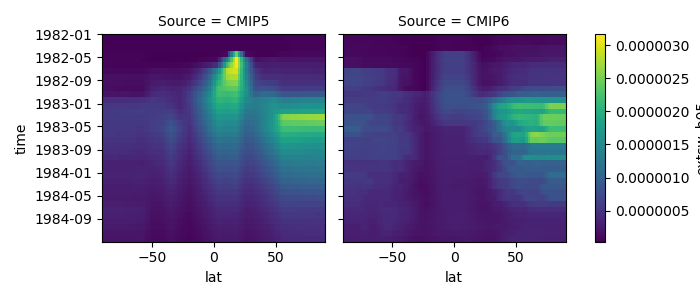

In [17]:
da.sel(time=slice('1982', '1984')).plot(col='Source', yincrease=False)

<IPython.core.display.Javascript object>


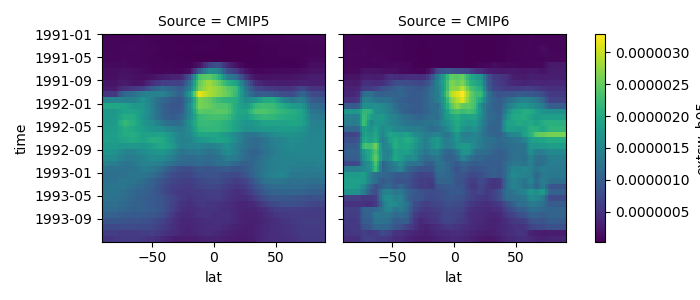

In [18]:
da.sel(time=slice('1991', '1993')).plot(col='Source', yincrease=False)